
Problem Statement
To build a recommender system for the Online Retail II UCI dataset, the aim is to suggest products to users based on their purchase history and product associations. This project will include:

Collaborative filtering: Recommend products based on customer preferences.
Market Basket Analysis (Apriori algorithm): Identify product bundles and association rules.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
data = pd.read_csv('online_retail_II.csv')

In [4]:
df = data.sample(frac=0.1)

In [5]:
df.isnull().sum()

Invoice            0
StockCode          0
Description      461
Quantity           0
InvoiceDate        0
Price              0
Customer ID    24179
Country            0
dtype: int64

In [6]:
df.dropna(subset=['Customer ID', 'Description'], inplace=True)

In [8]:
df = df[(df['Quantity']>0) & (df['Price']>0)]

In [9]:
df = df[df['Country']== 'United Kingdom']

In [10]:
df['Revenue'] = df['Quantity'] * df['Price']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72805 entries, 203390 to 676822
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Invoice      72805 non-null  object 
 1   StockCode    72805 non-null  object 
 2   Description  72805 non-null  object 
 3   Quantity     72805 non-null  int64  
 4   InvoiceDate  72805 non-null  object 
 5   Price        72805 non-null  float64
 6   Customer ID  72805 non-null  float64
 7   Country      72805 non-null  object 
 8   Revenue      72805 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 5.6+ MB


In [12]:
top_products_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products_quantity

Description
BROCADE RING PURSE                    12372
WHITE HANGING HEART T-LIGHT HOLDER    11023
ASSORTED COLOUR BIRD ORNAMENT          9734
WORLD WAR 2 GLIDERS ASSTD DESIGNS      8258
SET/6 FRUIT SALAD  PAPER PLATES        7038
PACK OF 60 PINK PAISLEY CAKE CASES     6790
60 TEATIME FAIRY CAKE CASES            6354
JUMBO BAG RED RETROSPOT                5958
PACK OF 72 RETROSPOT CAKE CASES        4894
BLACK SILVER FLOWER T-LIGHT HOLDER     4788
Name: Quantity, dtype: int64

In [13]:
top_products_revenue = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
top_products_revenue

Description
WHITE HANGING HEART T-LIGHT HOLDER    29604.71
REGENCY CAKESTAND 3 TIER              29207.13
Manual                                17554.66
ASSORTED COLOUR BIRD ORNAMENT         15269.66
JUMBO BAG RED RETROSPOT               10717.31
PARTY BUNTING                          7296.15
DOORMAT KEEP CALM AND COME IN          7005.26
PAPER CHAIN KIT 50'S CHRISTMAS         6778.11
CHILLI LIGHTS                          6347.54
HEART OF WICKER SMALL                  5702.08
Name: Revenue, dtype: float64

In [15]:
customer_activity = df.groupby('Customer ID')['Invoice'].count().sort_values(ascending=False)
customer_activity

Customer ID
17841.0    1295
12748.0     733
14606.0     718
14096.0     506
15311.0     450
           ... 
17510.0       1
15909.0       1
14453.0       1
17513.0       1
12346.0       1
Name: Invoice, Length: 4759, dtype: int64

C:\Users\91770\AppData\Local\Temp\ipykernel_11484\3487291979.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_quantity.values, y=top_products_quantity.index, palette="viridis")


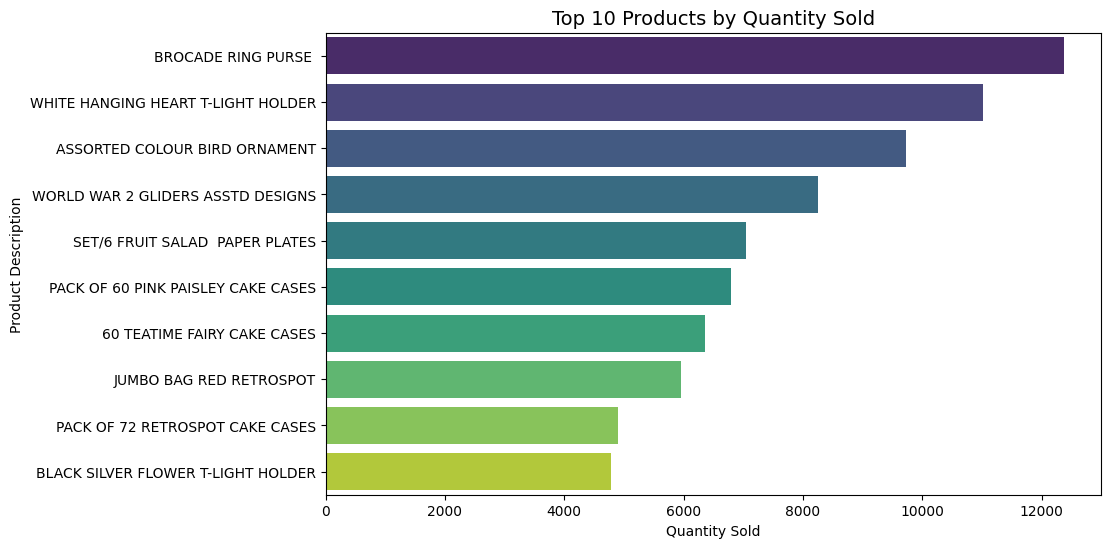

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products_quantity.values, y=top_products_quantity.index, palette="viridis")
plt.title('Top 10 Products by Quantity Sold', fontsize=14)
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()

C:\Users\91770\AppData\Local\Temp\ipykernel_11484\3148193974.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_revenue.values, y=top_products_revenue.index, palette="plasma")


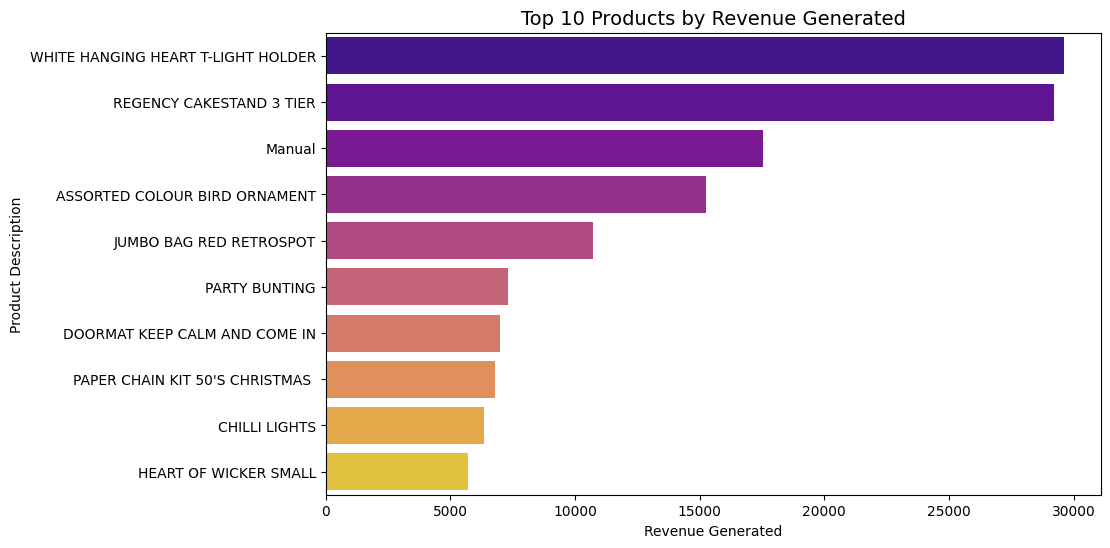

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products_revenue.values, y=top_products_revenue.index, palette="plasma")
plt.title('Top 10 Products by Revenue Generated', fontsize=14)
plt.xlabel('Revenue Generated')
plt.ylabel('Product Description')
plt.show()

In [23]:
basket = df.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().fillna(0)
basket

Description    DOORMAT UNION JACK GUNS AND ROSES   3 STRIPEY MICE FELTCRAFT  \
Invoice                                                                       
489434                                       0.0                        0.0   
489436                                       0.0                        0.0   
489437                                       0.0                        0.0   
489438                                       0.0                        0.0   
489442                                       0.0                        0.0   
...                                          ...                        ...   
581579                                       0.0                        0.0   
581580                                       0.0                        0.0   
581581                                       0.0                        0.0   
581585                                       0.0                        0.0   
581586                                       0.0                        0.0   

Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
Invoice                                                                       
489434                                  0.0                             0.0   
489436                                  0.0                             0.0   
489437                                  0.0                             0.0   
489438                                  0.0                             0.0   
489442                                  0.0                             0.0   
...                                     ...                             ...   
581579                                  0.0                             0.0   
581580                                  0.0                             0.0   
581581                                  0.0                             0.0   
581585                                  0.0                             0.0   
581586                                  0.0                             0.0   

Description   BLACK PIRATE TREASURE CHEST   BROWN  PIRATE TREASURE CHEST   \
Invoice                                                                     
489434                                0.0                             0.0   
489436                                0.0                             0.0   
489437                                0.0                             0.0   
489438                                0.0                             0.0   
489442                                0.0                             0.0   
...                                   ...                             ...   
581579                                0.0                             0.0   
581580                                0.0                             0.0   
581581                                0.0                             0.0   
581585                                0.0                             0.0   
581586                                0.0                             0.0   

Description   Bank Charges   CHERRY BLOSSOM  DECORATIVE FLASK  \
Invoice                                                         
489434                 0.0                                0.0   
489436                 0.0                                0.0   
489437                 0.0                                0.0   
489438                 0.0                                0.0   
489442                 0.0                                0.0   
...                    ...                                ...   
581579                 0.0                                0.0   
581580                 0.0                                0.0   
581581                 0.0                                0.0   
581585                 0.0                                0.0   
581586                 0.0                                0.0   

Description   DOLLY GIRL BEAKER   FLAMINGO LIGHTS  ...  \
Invoice                               

In [25]:
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

C:\Users\91770\AppData\Local\Temp\ipykernel_11484\3498954818.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


In [61]:
frequent_itemsets = apriori(basket, min_support=0.002, use_colnames=True)
frequent_itemsets

C:\Users\91770\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                               itemsets
0    0.002195      (12 MESSAGE CARDS WITH ENVELOPES)
1    0.002238  (12 PENCILS SMALL TUBE RED RETROSPOT)
2    0.003142          (12 PENCILS SMALL TUBE SKULL)
3    0.002109        (12 PENCILS TALL TUBE WOODLAND)
4    0.003185   (3 HEARTS HANGING DECORATION RUSTIC)
..        ...                                    ...
356  0.002970               (WOODLAND CHARLOTTE BAG)
357  0.003788    (WORLD WAR 2 GLIDERS ASSTD DESIGNS)
358  0.002712      (YOU'RE CONFUSING ME METAL SIGN )
359  0.006327          (ZINC METAL HEART DECORATION)
360  0.002066     (ZINC WILLIE WINKIE  CANDLE STICK)

[361 rows x 2 columns]

In [62]:
if frequent_itemsets.empty:
    print("No frequent itemsets found with the specified support threshold.")
else:
    num_itemsets = frequent_itemsets.shape[0]
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=num_itemsets)

In [63]:
rules = rules.sort_values('lift',ascending=False)

In [64]:
rules

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []

In [65]:
def search_product(product_partial):
    """
    Search for products containing the given partial name.
    """
    products = basket.columns
    matches = [p for p in products if product_partial.lower() in p.lower()]
    return matches

In [ ]:
def recommend_products(product_name, top_n=10):
    
    required_columns = ['antecedents', 'consequents', 'confidence', 'lift']
    for col in required_columns:
        if col not in rules.columns:
            print(f"Column '{col}' is missing in the rules DataFrame.")
            return pd.DataFrame()
    
    
    related_rules = rules[rules['antecedents'].apply(lambda x: product_name in x)]
    if related_rules.empty:
        print("No related rules found for the selected product.")
        return pd.DataFrame()
    
   
    recommendations = related_rules[['consequents', 'confidence', 'lift']].head(top_n)
    return recommendations


In [ ]:
def interactive_recommender():
   
    print("Available products in the dataset:")
    print(basket.columns.tolist())
    
   
    selected_product = input("Enter part of the product name you remember: ").strip()
    
    
    matched_products = [p for p in basket.columns if selected_product.lower() in p.lower()]
    if not matched_products:
        print("No matching products found. Try another keyword.")
        return
    
    
    print("Matched products:")
    for i, product in enumerate(matched_products, 1):
        print(f"{i}. {product}")
    
    
    try:
        choice = int(input(f"Select a product by number (1-{len(matched_products)}): ")) - 1
        if choice < 0 or choice >= len(matched_products):
            print("Invalid selection.")
            return
    except ValueError:
        print("Invalid input. Please enter a number.")
        return
    
    selected_product = matched_products[choice]
    print(f"Selected Product: {selected_product}")
    
    
    recommendations = recommend_products(selected_product, top_n=10)
    if recommendations.empty:
        print("No recommendations found for this product.")
    else:
        print("Top Recommendations:")
        print(recommendations)


In [75]:
interactive_recommender()

Available products in the dataset:
['  DOORMAT UNION JACK GUNS AND ROSES', ' 3 STRIPEY MICE FELTCRAFT', ' 4 PURPLE FLOCK DINNER CANDLES', " 50'S CHRISTMAS GIFT BAG LARGE", ' BLACK PIRATE TREASURE CHEST', ' BROWN  PIRATE TREASURE CHEST ', ' Bank Charges', ' CHERRY BLOSSOM  DECORATIVE FLASK', ' DOLLY GIRL BEAKER', ' FLAMINGO LIGHTS', ' HOME SWEET HOME  BLACKBOARD', ' I LOVE LONDON MINI BACKPACK', ' IVORY PAPER CUP CAKE CASES ', ' NEW BAROQUE BLACK BOXES', ' NINE DRAWER OFFICE TIDY', ' OVAL WALL MIRROR DIAMANTE ', ' PAINT YOUR OWN CANVAS SET', ' PEACE WOODEN BLOCK LETTERS', ' RED SPOT GIFT BAG LARGE', ' RED/WHITE DOT MINI CASES', ' RIDGED GLASS T-LIGHT HOLDER', ' SET 2 TEA TOWELS I LOVE LONDON ', ' SILVER CHERRY LIGHTS', ' SPACEBOY BABY GIFT SET', ' TRELLIS COAT RACK', ' VINTAGE DESIGN GIFT TAGS', ' WHITE BAMBOO RIBS LAMPSHADE', ' WHITE CHERRY LIGHTS', '10 COLOUR SPACEBOY PEN', '12 ASS ZINC CHRISTMAS DECORATIONS', '12 COLOURED PARTY BALLOONS', '12 DAISY PEGS IN WOOD BOX', '12 EGG HOUSE PA

In [56]:
df.head(5)

Invoice StockCode                         Description  Quantity  \
203390  509014     47566                       PARTY BUNTING        10   
647179  546778     82582           AREA PATROLLED METAL SIGN         9   
261995  514668     22105  MIRROR MOSAIC GOBLET CANDLE HOLDER         1   
134114  502113     21955  DOOR MAT UNION JACK GUNS AND ROSES         1   
495938  535803     22325              MOBILE VINTAGE HEARTS          2   

                InvoiceDate  Price  Customer ID         Country  Revenue  
203390  2010-05-19 13:36:00   4.65      15570.0  United Kingdom    46.50  
647179  2011-03-16 16:38:00   2.10      14572.0  United Kingdom    18.90  
261995  2010-07-05 13:14:00   4.25      17867.0  United Kingdom     4.25  
134114  2010-03-23 11:01:00   7.49      15998.0  United Kingdom     7.49  
495938  2010-11-28 14:57:00   4.95      14410.0  United Kingdom     9.90

In [71]:
print(rules.columns)
print(rules.head())

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift',
       'representativity', 'leverage', 'conviction', 'zhangs_metric',
       'jaccard', 'certainty', 'kulczynski'],
      dtype='object')
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []
